## Assignment 1 - Regression Problem

We will be using the World Happindes Dataset to create a regression model for Happiness.Score prediction for the countries based on Economy.GDP.per.Capita.

### Import Dependencies

- pandas - library that we will use for loading and displaying the data in a table

- numpy - library that we will use for linear algebra operations

- matplotlib - library that we will use for plotting the data

- plotly - library that we will use for plotting interactive 3D scatters

- linear_regression - custom implementation of linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data

In [2]:
df = pd.read_csv('Buachomphu DIREKPHON - world_happiness_report2019.csv')

# Print the data table.
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### <font color = 'red'> Q1. Write a command to show dimension of dataset </font>

In [3]:
df.shape

(156, 9)

#### <font color = 'red'> Q2. Write a command to print information about a DataFrame including the index dtype and columns, non-null values and memory usage. </font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### <font color = 'red'> Q3. Write a command to to view some basic statistical details like percentile, mean, std etc. </font>

In [5]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


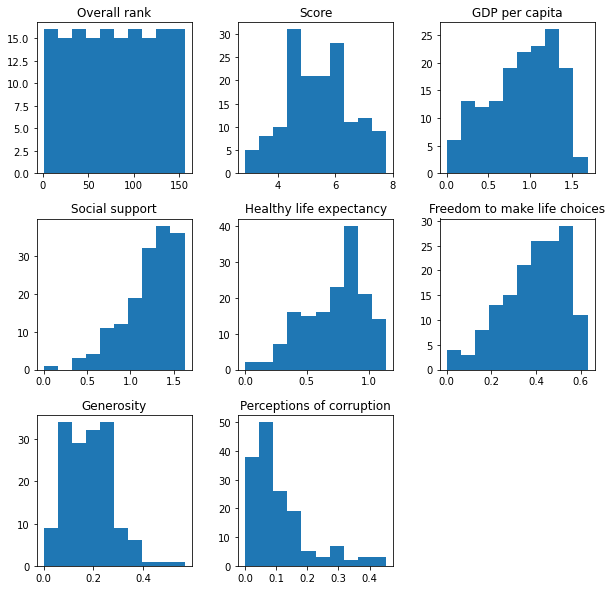

In [6]:
# Print histograms for each feature to see how they vary.
histohrams = df.hist(grid=False, figsize=(10, 10))

In [7]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


## 1. Univariate Linear Regression 

Lets select some features to explore more.

In [9]:
data = df[['GDP per capita','Score']]
data.head()

,GDP per capita,Score
0,1.340,7.769
1,1.383,7.600
2,1.488,7.554
3,1.380,7.494
4,1.396,7.488


#### <font color = 'red'> Q4. Write a command to show a scatter plot between GDP per capita and Hapiness Score.</font>

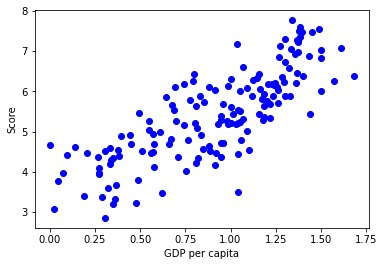

In [10]:
plt.scatter(df['GDP per capita'], df['Score'],  color='blue')
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.show()

### Split the Data Into Training and Test Sets

In this step we will split our dataset into training and testing subsets.

Training data set will be used for training of our linear model. Testing dataset will be used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

In [11]:
train_x = np.asanyarray(data[['GDP per capita']])    # np.asanyarray convert the input to an ndarray, but pass ndarray subclasses through.
train_y = np.asanyarray(data[['Score']])

#### <font color = 'red'> Q5. Write a command to split dataset into training and testing subsets in proportion 75/25% and random_state=100.</font>

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=100)

#### <font color = 'red'> Q6. Write a command to create a linear regression model.</font>

In [13]:
from sklearn import linear_model
regr  = linear_model.LinearRegression()

#### <font color = 'red'> Q7. Write a command to train the model.</font>

In [14]:
regr.fit (train_x, train_y)

LinearRegression()

In [15]:
# The coefficients

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.218148]]
Intercept:  [3.39934518]


### Plot output

#### <font color = 'red'> Q8. Write a command to plot the prediction line of the model.</font>

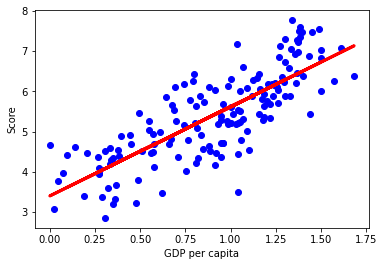

In [16]:
plt.plot(X_test, regr.predict(X_test), color="red", linewidth=3)
plt.scatter(df['GDP per capita'], df['Score'],  color='blue')
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.show()

### Prediction of the model on testing data

#### <font color = 'red'> Q9. Write a command to predict the testing data of the model.</font>

In [17]:
predictions = regr.predict(X_test)

#### Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error (MAE): It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

#### <font color = 'red'> Q10. Write a command to evaluate the model's performance i.e. MAE, MSE, RMSE and R2.</font>

In [18]:
from sklearn import metrics

print('MAE: %.2f' %(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: %.2f' %(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: %.2f' %(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R2-score: %.2f' %(metrics.r2_score(y_test, predictions)))

MAE: 0.57
MSE: 0.49
RMSE: 0.70
R2-score: 0.64


## 2. Multivariate Linear Regression 

Lets select some features to explore more.

In [19]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

#### <font color = 'red'> Q11. Write a command to choose 3 features that you think they are best to the model. Note that correlation of each feature pair might help you to choose.</font>

In [21]:
data = df[['Score','Social support','Healthy life expectancy','Freedom to make life choices']]

### Normalize the data

Normalizing in scikit_learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1).

In [22]:
X = np.asanyarray(data.drop('Score',axis=1))    # np.asanyarray convert the input to an ndarray, but pass ndarray subclasses through.
y = np.asanyarray(data[['Score']])

#### <font color = 'red'> Q12. Write a command to scale input vectors individually to unit norm by using "Normalier" method.</font>

In [23]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer('l1')
Xnorm = transformer.transform(X)

### Split the Data Into Training and Test Sets

In this step we will split our dataset into training and testing subsets.

Training data set will be used for training of our linear model. Testing dataset will be used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

#### <font color = 'red'> Q13. Write a command to split scaled input into training and testing subsets in proportion 75/25% and random_state=100.</font>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=0.25, random_state=100)

### Create and Training the model

In [25]:
from sklearn.linear_model import LinearRegression

mlreg = LinearRegression()

In [26]:
mlreg.fit(X_train,y_train)

LinearRegression()

In [27]:
# The coefficients
print ('Intercept: ',mlreg.intercept_)
print ('Coefficients: ',mlreg.coef_)

Intercept:  [1.99652231e+14]
Coefficients:  [[-1.99652231e+14 -1.99652231e+14 -1.99652231e+14]]


### Model Evaluation

Let's grab predictions off our test set and see how well it did!

In [28]:
predictions = mlreg.predict(X_test)

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

#### <font color = 'red'> Q14. Write a command to evaluate the model's performance i.e. MAE, MSE, RMSE and R2.</font>

In [29]:
print('MAE: %.2f' %(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: %.2f' %(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: %.2f' %(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R2-score: %.2f' %(metrics.r2_score(y_test, predictions)))

MAE: 0.98
MSE: 1.33
RMSE: 1.15
R2-score: 0.04
